<a href="https://colab.research.google.com/github/M4nu3l4rturo/Challenge_Alura_store/blob/main/AluraStoreLatam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("\n" + "="*50)
print("VISUALIZACIÓN DE RESULTADOS CLAVE")
print("="*50)

archivos_tiendas = {
    'Alura Store 1': 'tienda_1 .csv',
    'Alura Store 2': 'tienda_2.csv',
    'Alura Store 3': 'tienda_3.csv',
    'Alura Store 4': 'tienda_4.csv'
}

dataframes = []

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

archivos_tiendas = {
    'Alura Store 1': 'tienda_1.csv',
    'Alura Store 2': 'tienda_2.csv',
    'Alura Store 3': 'tienda_3.csv',
    'Alura Store 4': 'tienda_4.csv'
}

dataframes = []

for nombre_tienda, archivo in archivos_tiendas.items():
    try:
        df_temp = pd.read_csv(archivo)
        df_temp['Tienda'] = nombre_tienda
        dataframes.append(df_temp)
    except FileNotFoundError:
        print(f"Error: El archivo {archivo} no se encontró. Asegúrate de haberlo subido a Colab.")
        # Si un archivo falta, el script continuará con los que sí encontró.

df_combined = pd.concat(dataframes, ignore_index=True)

# 2. Creación de la columna de Facturación Total (Total_Venta)
# El precio final pagado por el cliente es la suma del Precio del producto y el Costo de envío.
df_combined['Total_Venta'] = df_combined['Precio'] + df_combined['Costo de envío']

# 3. Renombrar columnas para el análisis y simplificación
df = df_combined.rename(columns={
    'Categoría del Producto': 'Categoría',
    'Calificación': 'Evaluación',
    'Costo de envío': 'Costo_Envio'
})

print("✅ Datos cargados y consolidados exitosamente en el DataFrame 'df'.")

Error: El archivo tienda_1.csv no se encontró. Asegúrate de haberlo subido a Colab.
✅ Datos cargados y consolidados exitosamente en el DataFrame 'df'.


#1. Análisis de facturación



In [15]:
print("\n" + "—"*50)
print("1. FACTURACIÓN TOTAL DE CADA TIENDA")
print("—"*50)

# Agrupar por Tienda y sumar la facturación total
facturacion_por_tienda = df.groupby('Tienda')['Total_Venta'].sum().sort_values(ascending=False).astype(int)

# Almacenar resultados clave para el informe final
tienda_menos_facturacion = facturacion_por_tienda.index[-1]
facturacion_menos_vendida = facturacion_por_tienda.min()
facturacion_mas_vendida = facturacion_por_tienda.max()

# Mostrar el resultado en formato de moneda para fácil lectura
print(facturacion_por_tienda.map('COP {:,.0f}'.format))


——————————————————————————————————————————————————
1. FACTURACIÓN TOTAL DE CADA TIENDA
——————————————————————————————————————————————————
Tienda
Alura Store 2    COP 1,175,828,600
Alura Store 3    COP 1,156,536,200
Alura Store 4    COP 1,093,693,100
Name: Total_Venta, dtype: object


# 2. Ventas por categoría

In [16]:
print("\n" + "—"*50)
print("2. CATEGORÍAS MÁS POPULARES POR TIENDA (Top 3 por Transacciones)")
print("—"*50)

# Contar la cantidad de transacciones por Tienda y Categoría
categorias_por_tienda = df.groupby(['Tienda', 'Categoría']).size().reset_index(name='Total_Transacciones')

# Función para obtener el Top N de categorías por tienda
def top_n_categorias(grupo, n=3):
    return grupo.sort_values(by='Total_Transacciones', ascending=False).head(n)

# Aplicar la función a cada tienda
categorias_top_3 = categorias_por_tienda.groupby('Tienda').apply(top_n_categorias)

# Mostrar el resultado (limpiando el índice duplicado de 'Tienda')
print(categorias_top_3[['Tienda', 'Categoría', 'Total_Transacciones']].to_string(index=False))


——————————————————————————————————————————————————
2. CATEGORÍAS MÁS POPULARES POR TIENDA (Top 3 por Transacciones)
——————————————————————————————————————————————————
       Tienda    Categoría  Total_Transacciones
Alura Store 2      Muebles                  442
Alura Store 2 Electrónicos                  422
Alura Store 2     Juguetes                  313
Alura Store 3      Muebles                  499
Alura Store 3 Electrónicos                  451
Alura Store 3     Juguetes                  315
Alura Store 4      Muebles                  480
Alura Store 4 Electrónicos                  451
Alura Store 4     Juguetes                  338


/tmp/ipython-input-2766014942.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  categorias_top_3 = categorias_por_tienda.groupby('Tienda').apply(top_n_categorias)


# 3. Calificación promedio de la tienda


In [17]:
print("\n" + "—"*50)
print("3. PROMEDIO DE EVALUACIÓN DE LOS CLIENTES POR TIENDA")
print("—"*50)

# Agrupar por Tienda y calcular el promedio de la 'Evaluación'
evaluacion_promedio = df.groupby('Tienda')['Evaluación'].mean().sort_values(ascending=False).round(2)

# Almacenar resultados clave para el informe final
tienda_peor_evaluada = evaluacion_promedio.index[-1]
evaluacion_minima = evaluacion_promedio.min()
evaluacion_maxima = evaluacion_promedio.max()

print(evaluacion_promedio)


——————————————————————————————————————————————————
3. PROMEDIO DE EVALUACIÓN DE LOS CLIENTES POR TIENDA
——————————————————————————————————————————————————
Tienda
Alura Store 3    4.05
Alura Store 2    4.04
Alura Store 4    4.00
Name: Evaluación, dtype: float64


# 4. Productos más y menos vendidos

In [18]:
print("\n" + "—"*50)
print("4. PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA")
print("—"*50)

# Contar la cantidad de transacciones por Tienda y Producto
ventas_por_producto = df.groupby(['Tienda', 'Producto']).size().reset_index(name='Total_Transacciones')

def productos_extremos(grupo):
    if grupo.empty:
        return pd.DataFrame([{'Tipo': 'N/A', 'Producto': 'N/A', 'Cantidad': 0}])

    # Producto más vendido (máximo de transacciones)
    mas_vendido = grupo.loc[grupo['Total_Transacciones'].idxmax()]

    # Producto menos vendido (mínimo de transacciones)
    menos_vendido = grupo.loc[grupo['Total_Transacciones'].idxmin()]

    return pd.DataFrame([
        {'Tipo': 'Más Vendido', 'Producto': mas_vendido['Producto'], 'Cantidad': mas_vendido['Total_Transacciones']},
        {'Tipo': 'Menos Vendido', 'Producto': menos_vendido['Producto'], 'Cantidad': menos_vendido['Total_Transacciones']}
    ])

# Aplicar la función a cada tienda
productos_extremos_por_tienda = ventas_por_producto.groupby('Tienda').apply(productos_extremos).reset_index(drop=True)

print(productos_extremos_por_tienda.to_string(index=False))


——————————————————————————————————————————————————
4. PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA
——————————————————————————————————————————————————
         Tipo                  Producto  Cantidad
  Más Vendido Iniciando en programación        65
Menos Vendido             Juego de mesa        32
  Más Vendido             Kit de bancas        57
Menos Vendido   Bloques de construcción        35
  Más Vendido                  Cama box        62
Menos Vendido        Guitarra eléctrica        33


/tmp/ipython-input-775810377.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  productos_extremos_por_tienda = ventas_por_producto.groupby('Tienda').apply(productos_extremos).reset_index(drop=True)


# 5. Envío promedio por tienda

In [24]:
print("\n" + "—"*50)
print("5. COSTO PROMEDIO DEL ENVÍO POR TIENDA")
print("—"*50)

# Agrupar por Tienda y calcular el costo promedio de envío
costo_promedio_envio = df.groupby('Tienda')['Costo_Envio'].mean().sort_values(ascending=False).round(2)

# Almacenar resultados clave para el informe final
tienda_costo_envio_alto = costo_promedio_envio.index[0]
costo_envio_minimo = costo_promedio_envio.min()
costo_envio_maximo = costo_promedio_envio.max()

print(costo_promedio_envio.map('COP {:,.0f}'.format))


——————————————————————————————————————————————————
5. COSTO PROMEDIO DEL ENVÍO POR TIENDA
——————————————————————————————————————————————————
Tienda
Alura Store 2    COP 25,216
Alura Store 3    COP 24,806
Alura Store 4    COP 23,459
Name: Costo_Envio, dtype: object


/tmp/ipython-input-1322253783.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=facturacion_por_tienda.index, y=facturacion_por_tienda.values, palette=colores)


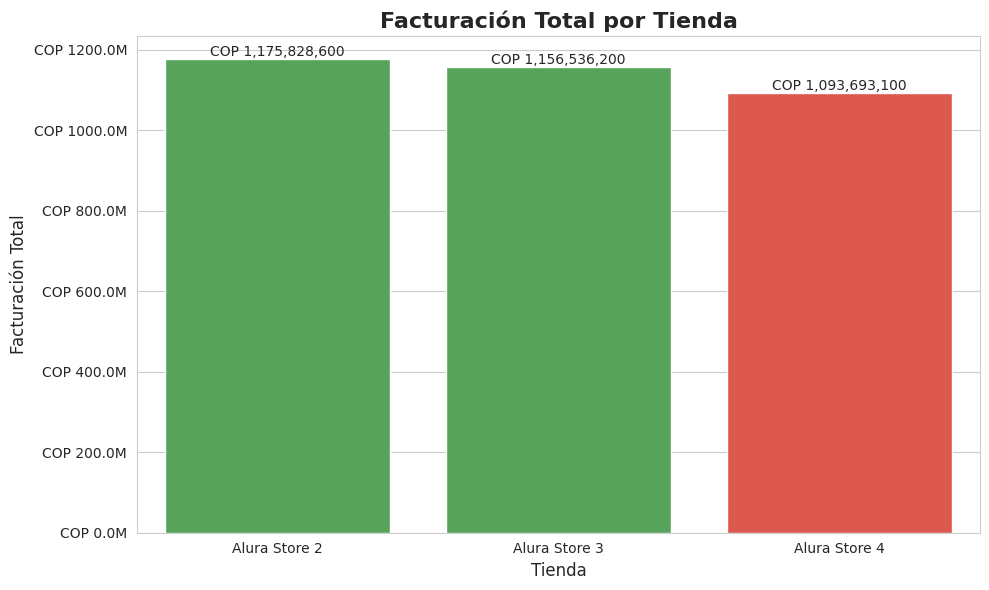


✅ Gráfico generado. La tienda **Alura Store 4** se destaca en rojo por su menor facturación, la cual es la base para la recomendación estratégica.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Configuración básica para el gráfico
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# -----------------------------------------------------------
# GRÁFICO 1: FACTURACIÓN TOTAL (Principal Indicador de Lucro)
# -----------------------------------------------------------

plt.figure(figsize=(10, 6))

colores = ['#4CAF50' if tienda != tienda_menos_facturacion else '#F44336' for tienda in facturacion_por_tienda.index]
ax = sns.barplot(x=facturacion_por_tienda.index, y=facturacion_por_tienda.values, palette=colores)

# Formato del eje Y a millones de COP (para mejor lectura)
def formato_millones(x, pos):
    return 'COP {:1.1f}M'.format(x / 1e6)

formatter = FuncFormatter(formato_millones)
ax.yaxis.set_major_formatter(formatter)

# Agregar etiquetas de valor en la parte superior de cada barra
for i in ax.containers:
    ax.bar_label(i, fmt='COP {:,.0f}'.format)

plt.title('Facturación Total por Tienda', fontsize=16, weight='bold')
plt.ylabel('Facturación Total', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\n✅ Gráfico generado. La tienda **{tienda_menos_facturacion}** se destaca en rojo por su menor facturación, la cual es la base para la recomendación estratégica.")